# TOURIST BEHAVIOUR ANALYSIS

In [1]:
#import needed libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('tourist behaviour.csv')
df.head()

,Tourist_ID,Age,Annual_Income,Expenditure,Travel_Frequency,Activity_Interest
0,T001,25,45000,5000,3,Adventure
1,T002,34,78000,12000,6,Leisure
2,T003,29,56000,8000,4,Cultural
3,T004,40,92000,15000,9,Shopping
4,T005,23,30000,4000,2,Adventure


In [7]:
# Encode the categorical column "Activity_Interest"
df['Activity_Interest'] = df['Activity_Interest'].astype('category').cat.codes

In [9]:
# Select features for clustering
features = df[['Age', 'Annual_Income', 'Expenditure', 'Travel_Frequency', 'Activity_Interest']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [11]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

D:\jupyter notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\jupyter notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\jupyter notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\jupyter notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when the

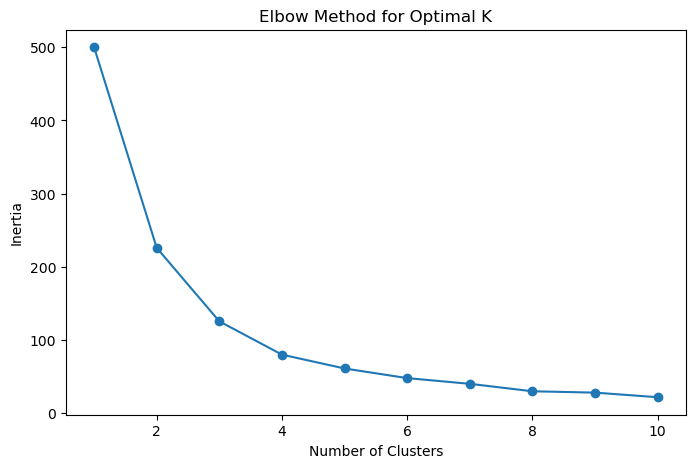

In [13]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

D:\jupyter notebook\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


               Age  Annual_Income   Expenditure  Travel_Frequency  \
Cluster                                                             
0        38.636364   83454.545455  12196.969697          6.393939   
1        26.307692   47923.076923   5965.384615          2.961538   
2        30.600000   62720.000000   8804.000000          4.400000   
3        47.687500  103437.500000  16281.250000          9.000000   

         Activity_Interest  
Cluster                     
0                 1.030303  
1                 0.384615  
2                 2.600000  
3                 2.562500  


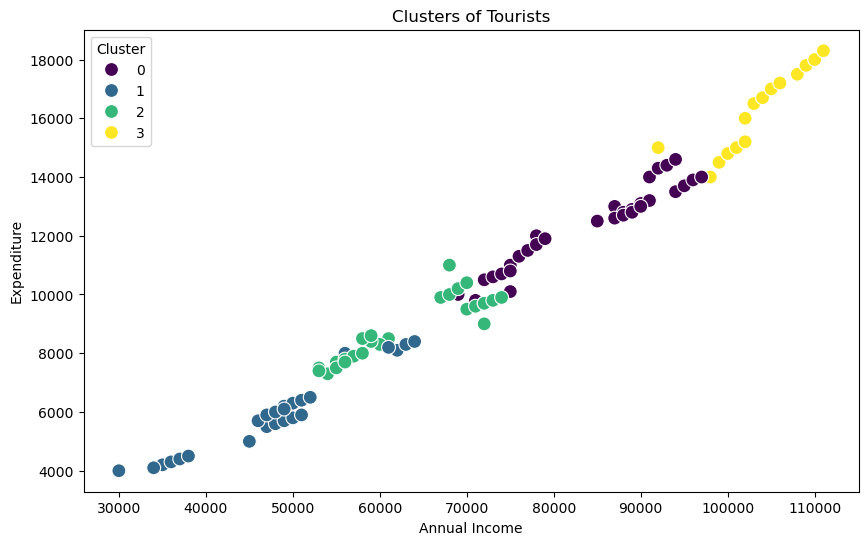

In [20]:
# Perform K-Means clustering with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clustering results
# Exclude 'Tourist_ID' before computing the mean
print(df.drop(columns=['Tourist_ID']).groupby('Cluster').mean())


# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income',y='Expenditure',hue='Cluster',data=df, palette='viridis',s=100)
plt.title("Clusters of Tourists")
plt.xlabel("Annual Income")
plt.ylabel("Expenditure")
plt.legend(title='Cluster')
plt.show()